In [2]:
import csv
import os
import numpy as np
import pandas as pd
from PIL import Image
import cv2
import matplotlib.pyplot as plt

In [3]:
filename = "mpii_human_pose.csv"

In [ ]:
#u novi folder prebacuje slike za koje postoje anotacije u csv fajlu

fields = []
rows = []
 
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
 
    fields = next(csvreader)
 
    for row in csvreader:
        rows.append(row)
 
for row in rows[:len(rows)]:
    name = row[1]
    if os.path.exists("images/"+name):
        os.replace("images/"+name, "images_extract/"+name)


In [ ]:
#ucitava informacije o slikama koje sadrze vise od jedne osobe
file1 = open("images.txt","r")
b = []
lines = file1.readlines()
for i in range(len(lines)):
    lines[i] = lines[i].rstrip()
    #brise slike
    if os.path.exists("images_extract/" + lines[i]):
        os.remove( "images_extract/" + lines[i])


In [4]:
# csv fajl cita kao pandas dataframe
df = pd.read_csv(filename)

In [ ]:
#izbacuje sve redove iz tabele koji sadrze indeks slike koja se nalazi u fajlu images.txt
df = df.drop(df[df['NAME'].isin(lines)].index)

In [ ]:
df

In [ ]:
#konvertuje df u csv i cuva ga
x = df.to_csv('mpii_new.csv', index=False)

In [ ]:
from PIL import Image

#Funkcija za pravljenje padding-a
def make_square(im, min_size=256, fill_color=(0, 0, 0, 255)):
    x, y = im.size
    size = max(min_size, x, y)
    new_im = Image.new('RGBA', (size, size), fill_color)
    new_im.paste(im, (0, 0))
    return new_im

image_path = "images_extract/000234747.jpg"
im = Image.open(image_path)
make_square(im).show()


In [ ]:
filename = "mpii_new.csv"

fields = []
rows = []
 
with open(filename, 'r') as csvfile:
    csvreader = csv.reader(csvfile)
 
    fields = next(csvreader)
 
    for row in csvreader:
        rows.append(row)
 
#Izdvajanje trening podataka
for row in rows[:8001]:
    name = row[1]
    if os.path.exists("images_extract/"+name):
        os.replace("images_extract/"+name, "images_training/"+name)

#Izdvajanje test podataka
for row in rows[8001:11430]:
    name = row[1]
    if os.path.exists("images_extract/"+name):
        os.replace("images_extract/"+name, "images_test/"+name)
  

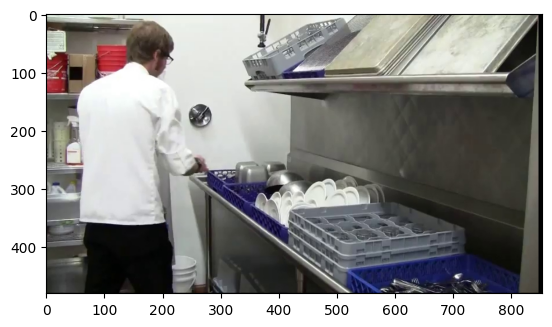

FileNotFoundError: [Errno 2] No such file or directory: 'heat_maps\\hm000013469.jpg'

In [45]:

path = "images_training"
for image in os.listdir(path):
    #izdvajanje podataka o slici
    img = Image.open(os.path.join(path, image))

    plt.imshow(img, cmap='viridis')
    plt.show()

    rezultat = df[df['NAME'] == image]
    rezultat_numpy = rezultat.to_numpy()[0]
    #generisanje heat map-e
    mapa = np.array(img)

    boja = [255, 0, 0]
    sirina = 10

    for k in range(2, len(rezultat_numpy) - 3, 2):
        if rezultat_numpy[k] == -1 or rezultat_numpy[k + 1] == -1:
            continue
        x = round(rezultat_numpy[k])
        y = round(rezultat_numpy[k + 1])
        for i in range(max(0, y - sirina), min(mapa.shape[0], y + sirina)):
            for j in range(max(0, x - sirina), min(mapa.shape[1], x + sirina)):
                mapa[i, j] = boja
            

    # Sačuvaj novu sliku
    plt.imsave('heat_maps_training\\hm' + image, mapa)
    break


105 354
111 230
108 292
485 279
491 277
704 193
1008 452
801 432
566 374
404 183
218 6


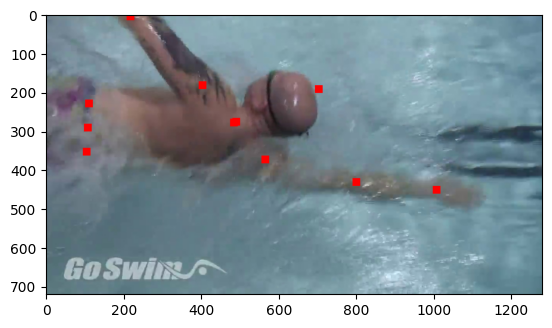

In [36]:
len(rezultat_numpy[0])

37